# Mean Reversion -  Pairs Trading
- Long Pair: Long stock A and short stock B,
- Short Pair: Short stock A and long stock B,
- If a relationship is found suggesting that the prices move in opposite directions, you can long/short the pair since as it can be expected that due to the correlation the pair will converge back to its original form.


## Strategy 
1) Find 2 assets that move similarly with eachother either a negative or positive correlation
2) Sell the 'overvalued' stock and buy the 'undervalued' 
3) If the ratio changes significantly, then you know it is time to trade. 'Significance' can be measured with standard deviation.

In [13]:
!pip install pandas-datareader

In [14]:
!pip install yfinance

In [1]:
import re
from io import StringIO
from datetime import datetime, timedelta
import requests
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

In [2]:
import pandas as pd
import pickle
URL = 'https://www1.nseindia.com/content/indices/ind_nifty50list.csv'
df = pd.read_csv(URL, index_col = 'Company Name')
df["Symbol"].to_list()

['ADANIENT',
 'ADANIPORTS',
 'APOLLOHOSP',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BPCL',
 'BHARTIARTL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'HDFC',
 'ICICIBANK',
 'ITC',
 'INDUSINDBK',
 'INFY',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'M&M',
 'MARUTI',
 'NTPC',
 'NESTLEIND',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBILIFE',
 'SBIN',
 'SUNPHARMA',
 'TCS',
 'TATACONSUM',
 'TATAMOTORS',
 'TATASTEEL',
 'TECHM',
 'TITAN',
 'UPL',
 'ULTRACEMCO',
 'WIPRO']

In [3]:
yf.pdr_override()

In [2]:
start=datetime(2017, 1, 1)
end=datetime(2023, 4, 8)

In [5]:
ticks = df["Symbol"].to_list()
ticks=[tick+'.NS' for tick in ticks]
d=pdr.get_data_yahoo(ticks, start, end)

TypeError: string indices must be integers

In [ ]:
#Computing the pairwise correlation of Companies 
corr_matrix = d.corr()
corr_matrix

Symbols        ADANIENT.NS  ADANIPORTS.NS  APOLLOHOSP.NS  ASIANPAINT.NS  \
Symbols                                                                   
ADANIENT.NS       1.000000       0.921592       0.888078       0.883952   
ADANIPORTS.NS     0.921592       1.000000       0.924339       0.903080   
APOLLOHOSP.NS     0.888078       0.924339       1.000000       0.962449   
ASIANPAINT.NS     0.883952       0.903080       0.962449       1.000000   
AXISBANK.NS       0.520396       0.615944       0.534522       0.516810   
BAJAJ-AUTO.NS     0.828518       0.906571       0.849524       0.883062   
BAJFINANCE.NS     0.858267       0.894938       0.949828       0.965237   
BAJAJFINSV.NS     0.871479       0.898600       0.946400       0.918970   
BPCL.NS           0.332651       0.523672       0.525784       0.555320   
BHARTIARTL.NS     0.847567       0.815491       0.883537       0.886100   
BRITANNIA.NS      0.684762       0.670608       0.753905       0.837223   
CIPLA.NS          0.886204       0.895506       0.894221       0.891841   
COALINDIA.NS      0.308817       0.206098       0.024626      -0.078176   
DIVISLAB.NS       0.752979       0.824858       0.925222       0.950690   
DRREDDY.NS        0.612987       0.661980       0.759628       0.844002   
EICHERMOT.NS      0.709807       0.710284       0.589000       0.574333   
GRASIM.NS         0.836965       0.929461       0.867275       0.788515   
HCLTECH.NS        0.811388       0.883269       0.962267       0.958232   
HDFCBANK.NS       0.742407       0.850630       0.868535       0.903921   
HDFCLIFE.NS       0.438919       0.589997       0.653310       0.733081   
HEROMOTOCO.NS     0.017837       0.146239      -0.005320      -0.017674   
HINDALCO.NS       0.820483       0.916574       0.908779       0.831472   
HINDUNILVR.NS     0.737400       0.709245       0.796781       0.895736   
HDFC.NS           0.652066       0.791552       0.820305       0.841105   
ICICIBANK.NS      0.923234       0.916377       0.934918       0.945145   
ITC.NS            0.555404       0.426263       0.257498       0.202500   
INDUSINDBK.NS    -0.328984      -0.270273      -0.450624      -0.536452   
INFY.NS           0.839830       0.898820       0.974403       0.968655   
JSWSTEEL.NS       0.891901       0.952572       0.928506       0.897399   
KOTAKBANK.NS      0.700776       0.771809       0.811353       0.874874   
LT.NS             0.820359       0.864017       0.819604       0.751991   
M&M.NS            0.779533       0.723547       0.588148       0.556898   
MARUTI.NS         0.386554       0.376757       0.239575       0.185683   
NTPC.NS           0.815748       0.738599       0.632101       0.556808   
NESTLEIND.NS      0.715374       0.692368       0.820334       0.903856   
ONGC.NS           0.332822       0.393357       0.268074       0.109925   
POWERGRID.NS      0.949218       0.920826       0.900174       0.867004   
RELIANCE.NS       0.823701       0.814275       0.894656       0.934106   
SBILIFE.NS        0.861598       0.846802       0.901476       0.921777   
SBIN.NS           0.886337       0.905911       0.850458       0.793943   
SUNPHARMA.NS      0.919426       0.895747       0.885161       0.842131   
TCS.NS            0.803986       0.870182       0.945052       0.960743   
TATACONSUM.NS     0.868251       0.904059       0.951673       0.966471   
TATAMOTORS.NS     0.696155       0.767556       0.683178       0.572969   
TATASTEEL.NS      0.949669       0.871498       0.814965       0.794433   
TECHM.NS          0.751843       0.834695       0.940869       0.894232   
TITAN.NS          0.927034       0.906225       0.954091       0.938144   
UPL.NS            0.779801       0.861423       0.822809       0.794625   
ULTRACEMCO.NS     0.799370       0.930994       0.938286       0.909313   
WIPRO.NS          0.723792       0.859784       0.933908       0.896497   

Symbols        AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BAJAJFINSV.NS  \
Symbols                 

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

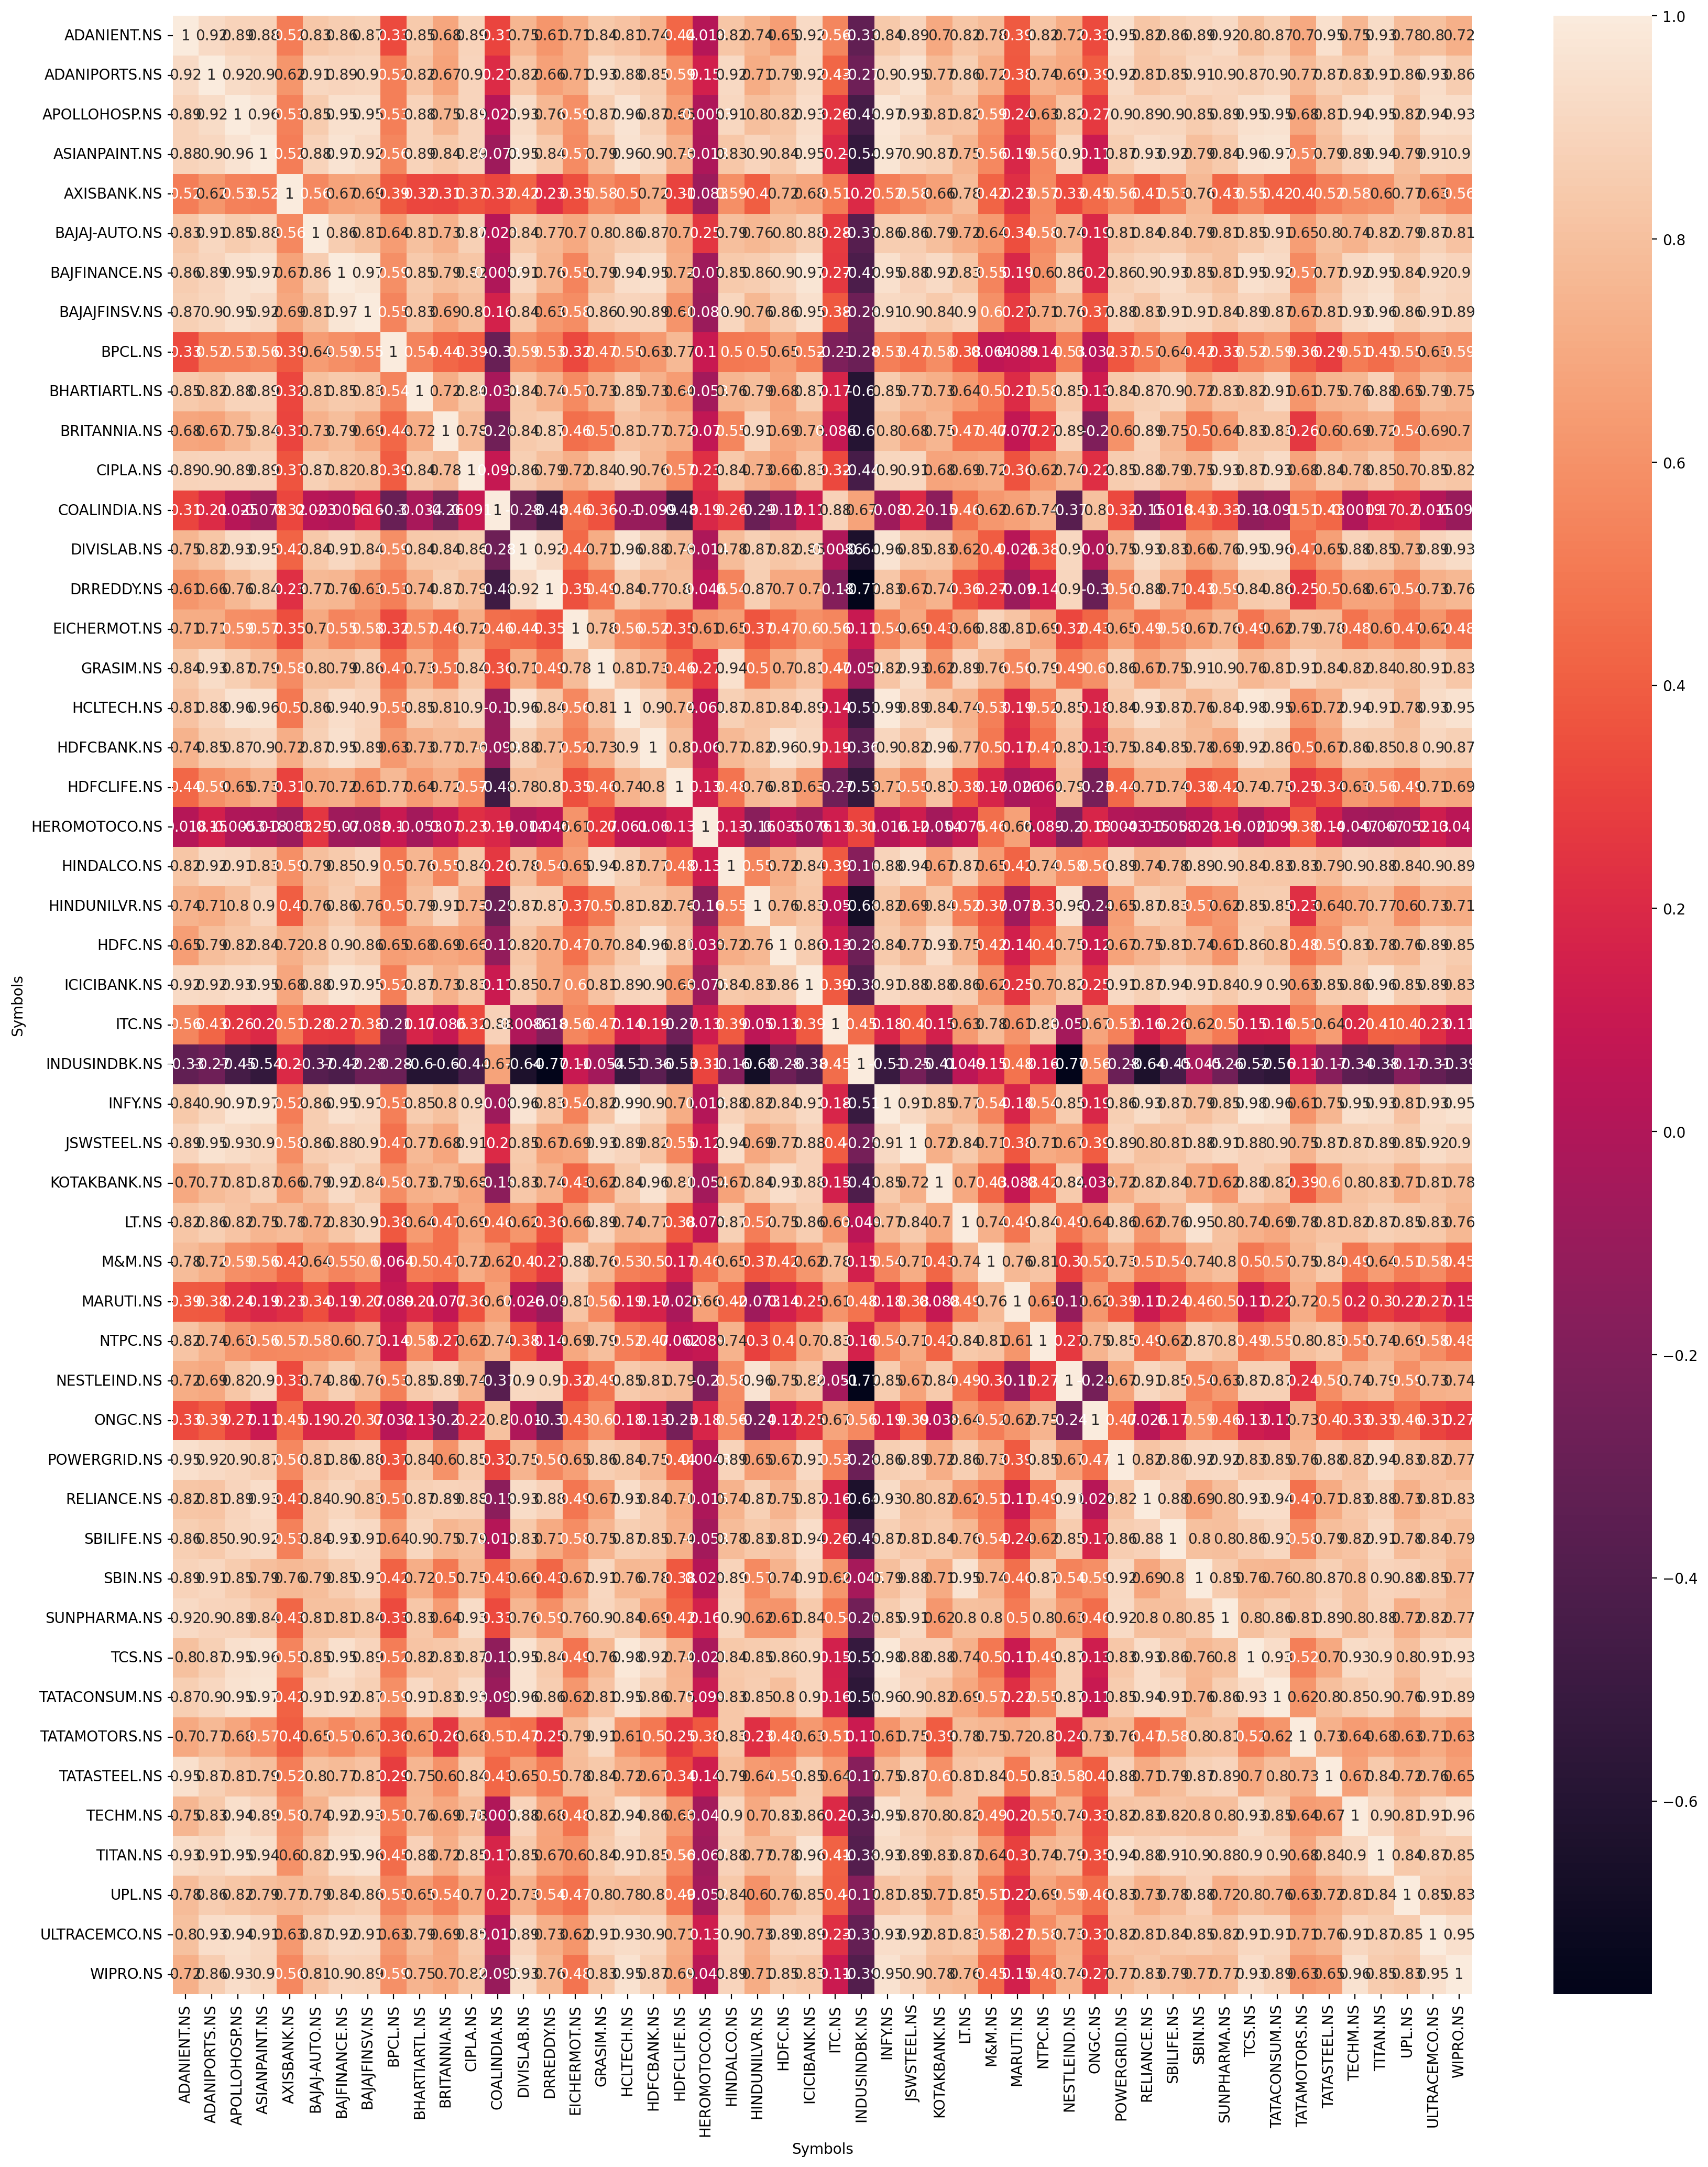

In [ ]:
# heatmap matrix of corelation
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(20, 25), dpi=200)
sn.heatmap(corr_matrix, annot = True)

In [ ]:
neg_corr=[]
stocks=set()
for i in corr_matrix.columns:
    for j in corr_matrix.index:
        if corr_matrix[i][j]<0:
            stocks.add(i)
            stocks.add(j)
            neg_corr.append((i,j,corr_matrix[i][j]))
neg_corr

[('ADANIENT.NS', 'INDUSINDBK.NS', -0.32898444795606446),
 ('ADANIPORTS.NS', 'INDUSINDBK.NS', -0.27027349288251146),
 ('APOLLOHOSP.NS', 'HEROMOTOCO.NS', -0.005320281790048085),
 ('APOLLOHOSP.NS', 'INDUSINDBK.NS', -0.4506241124367523),
 ('ASIANPAINT.NS', 'COALINDIA.NS', -0.07817606020547598),
 ('ASIANPAINT.NS', 'HEROMOTOCO.NS', -0.01767419098356685),
 ('ASIANPAINT.NS', 'INDUSINDBK.NS', -0.5364524089600292),
 ('AXISBANK.NS', 'HEROMOTOCO.NS', -0.08306383271659333),
 ('BAJAJ-AUTO.NS', 'INDUSINDBK.NS', -0.3716187046914053),
 ('BAJFINANCE.NS', 'COALINDIA.NS', -0.0055645228909600225),
 ('BAJFINANCE.NS', 'HEROMOTOCO.NS', -0.0702066358695853),
 ('BAJFINANCE.NS', 'INDUSINDBK.NS', -0.4183693513190909),
 ('BAJAJFINSV.NS', 'HEROMOTOCO.NS', -0.08762602504959421),
 ('BAJAJFINSV.NS', 'INDUSINDBK.NS', -0.2771528619804381),
 ('BPCL.NS', 'COALINDIA.NS', -0.29732806129477135),
 ('BPCL.NS', 'ITC.NS', -0.2093384923243102),
 ('BPCL.NS', 'INDUSINDBK.NS', -0.28225825187275483),
 ('BHARTIARTL.NS', 'COALINDIA.NS'

In [ ]:
!pip install pyfolio --quiet


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pyfolio as pf

c:\Users\YashC\AppData\Local\Programs\Python\Python310\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:
def sharpe_ratio_calc(return_series, rf):

    mean = return_series.mean()-rf

    sigma = return_series.std()

    return mean / sigma

In [ ]:
def calc_returns_short(stock):
    day0=stock.iloc[0]
    ret=[]
    for i in range(1, stock.shape[0]):
        ret.append((day0-stock.iloc[i])/day0)

    return pd.Series(ret, index=d.index[1:])

In [ ]:
def sharpe_ratio(long, short):
    weights=[0.5, 0.5]

    long_ret=d[long].pct_change().dropna()
    short_ret=d[short].pct_change().dropna()
    r=pd.DataFrame({
        "long":long_ret,
        "short":short_ret,
    }, index=long_ret.index)
    
    portfolio_returns=pd.Series(np.dot(weights, r.T), index = r.index)
    
    return sharpe_ratio_calc(portfolio_returns, 0.07)* np.sqrt(252)

In [ ]:
sharpe_ratio(long='DRREDDY.NS', short='INDUSINDBK.NS')

7.319548464491217

In [ ]:
4579-2347 # DR REDDY 
#total profit from DR REDDY (long)
#shares bought at 2347 for 5y and sold at 4579

2232

In [ ]:
1660-1132 #INDUSIND
#total profit from INDUSIND(short)
#shares short at 1660 and after 5Y settles at 1132

528

In [ ]:
2232+528 #net profit from long + short

2760

In [ ]:
2347+1660 #total investment on the stocks
# 1 unit of both the stocks

4007

In [ ]:
2760/4007
#returns i.e. profit/investment

0.6887946094334914

In [ ]:
pairings=[['DRREDDY.NS', 'INDUSINDBK.NS'], ['POWERGRID.NS','INDUSINDBK.NS'], ['DRREDDY.NS', 'HEROMOTOCO.NS'], ['SUNPHARMA.NS','INDUSINDBK.NS'], ['BRITANNIA.NS', 'INDUSINDBK.NS']]
for i, j in pairings:
    print(i, j, sharpe_ratio(i, j))

DRREDDY.NS INDUSINDBK.NS 7.319548464491217
POWERGRID.NS INDUSINDBK.NS 7.319464781366895
DRREDDY.NS HEROMOTOCO.NS 2.2862553315856418
SUNPHARMA.NS INDUSINDBK.NS 7.308236394404041
BRITANNIA.NS INDUSINDBK.NS 7.321977134299162


In [ ]:
def calc_returns(long, short):
    weights=[0.5, 0.5]

    long_ret=d[long].pct_change().dropna()
    short_ret=d[short].pct_change().dropna()
    r=pd.DataFrame({
        "long":long_ret,
        "short":short_ret,
    }, index=long_ret.index)
    
    portfolio_returns=pd.Series(np.dot(weights, r.T), index = r.index)

    

In [ ]:
def get_df(neg_corr):
    company1, company2, returns, sharpe, corr=[],[],[],[],[]
    for comp1, comp2 in neg_corr:
        company1.append(comp1)
        company2.append(comp2)
        corr.append(d[comp1].corr(d[comp2]))
        sharpe.append(sharpe_ratio(comp1, comp2))
        # returns.append(calc_returns(comp1, comp2))

    return pd.DataFrame({
        "Stock 1":company1,
        "Stock 2":company2,
        "Correlation":corr,
        "Sharpe Ratio":sharpe,
        # "Returns":returns,
    })

corr_df=get_df(pairings)

In [ ]:
corr_df

Stock 1        Stock 2  Correlation  Sharpe Ratio
0    DRREDDY.NS  INDUSINDBK.NS    -0.773245      7.319548
1  POWERGRID.NS  INDUSINDBK.NS    -0.283377      7.319465
2    DRREDDY.NS  HEROMOTOCO.NS     0.046420      2.286255
3  SUNPHARMA.NS  INDUSINDBK.NS    -0.257624      7.308236
4  BRITANNIA.NS  INDUSINDBK.NS    -0.598868      7.321977

In [ ]:
corr_df.to_csv('./sharpe_ratio.csv')

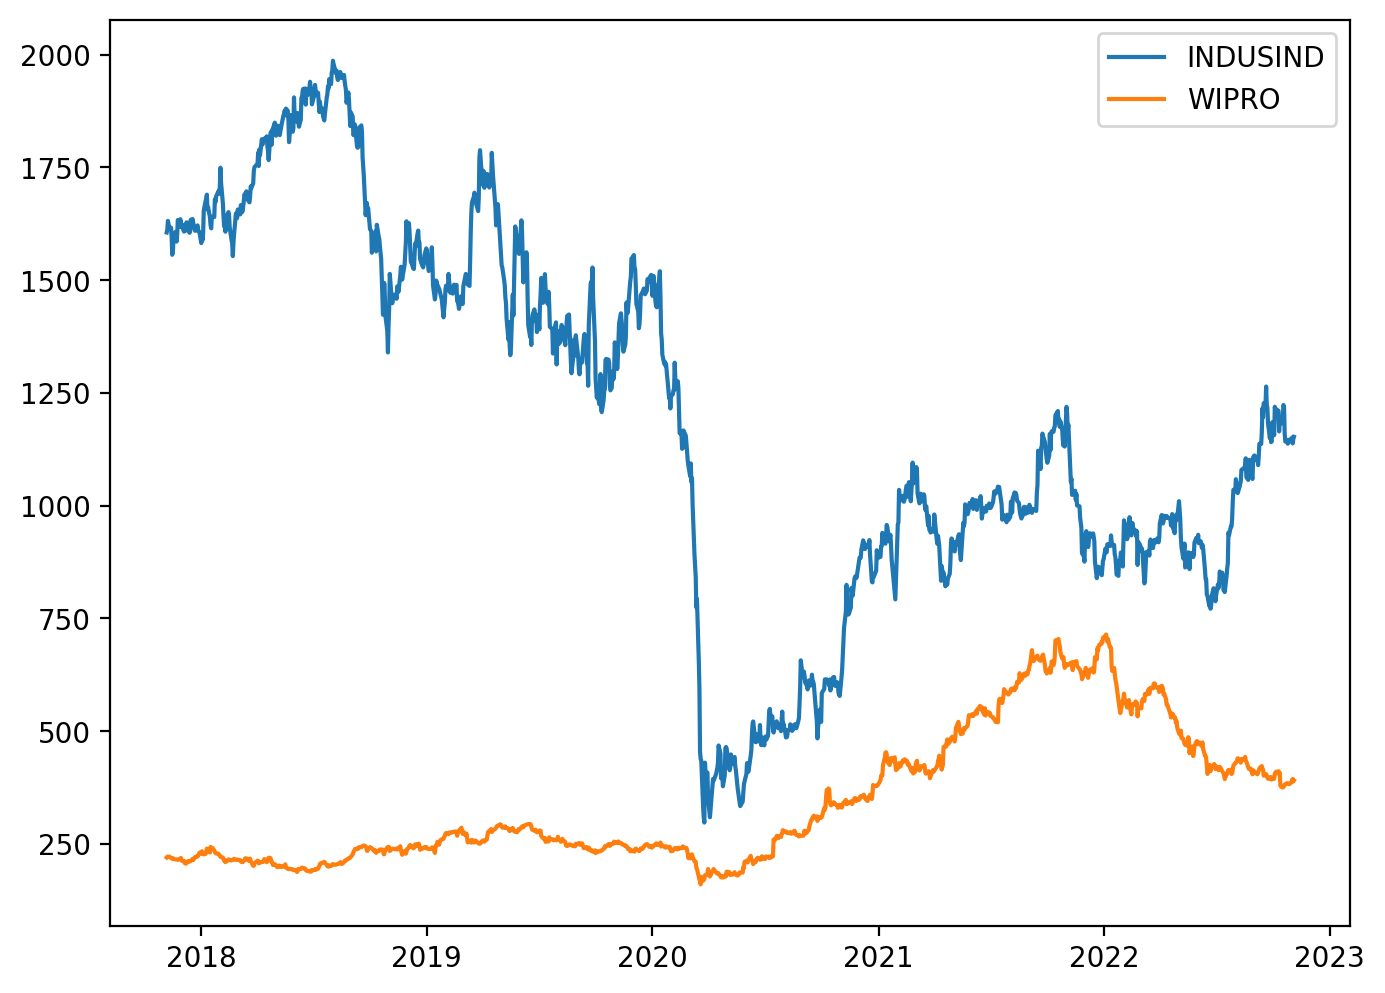

In [ ]:
# check out the relationship between the stocks
# correlation is very high because the data is not standardized
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=200)
IND = d['INDUSINDBK.NS'] # INDUSIND
WIP = d['WIPRO.NS'] # WIPRO
plt.plot(IND, label = "INDUSIND")
plt.plot(WIP, label = "WIPRO")
plt.legend()


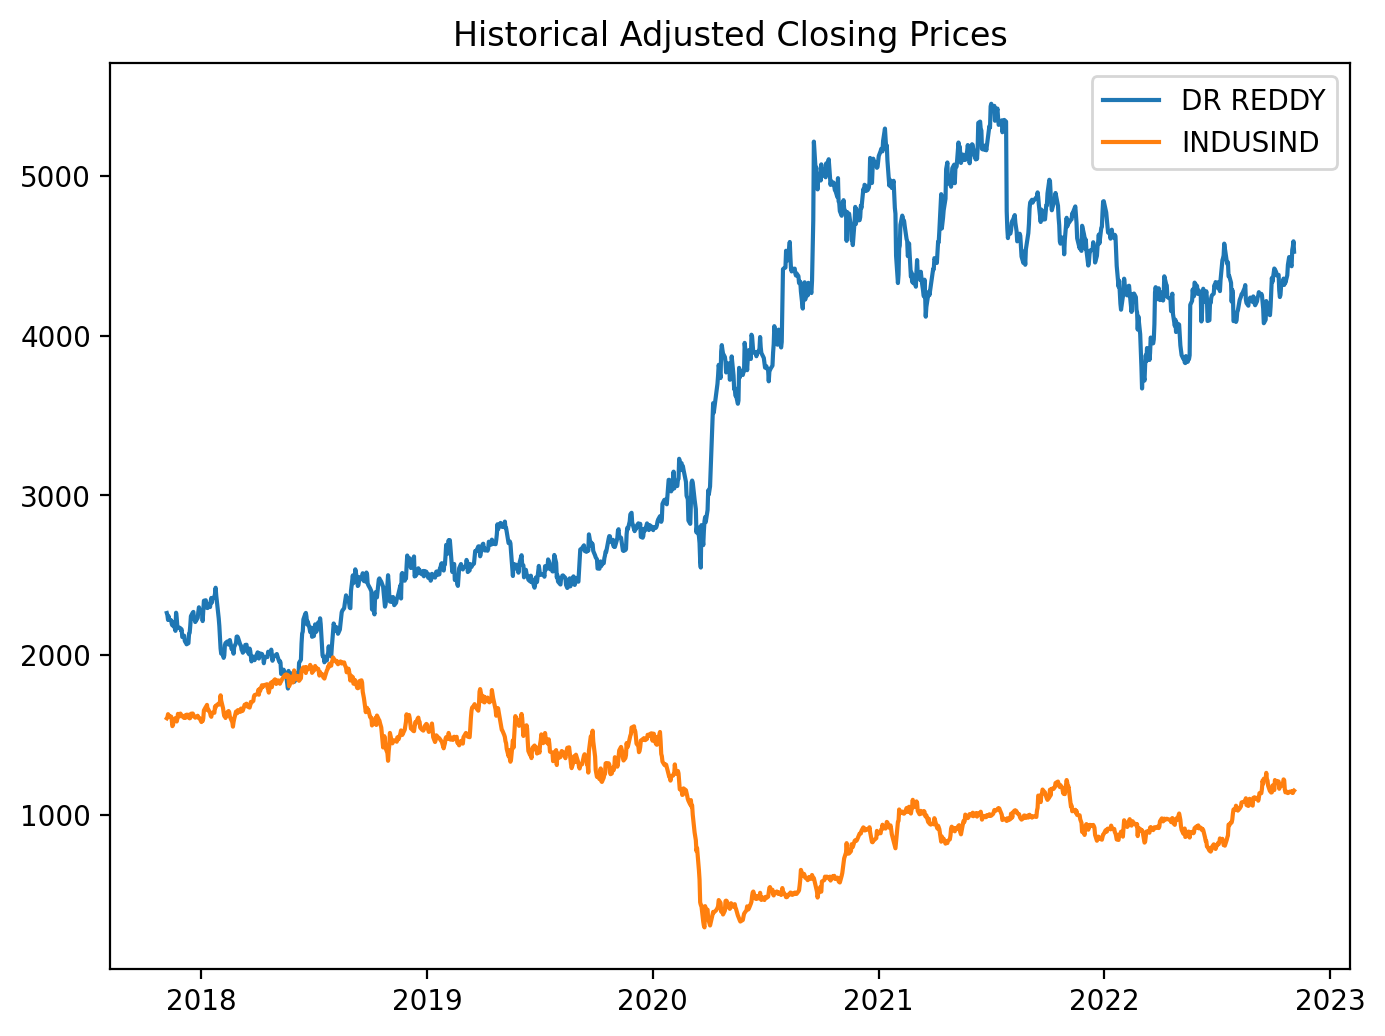

In [ ]:
# More reasonable pair
figure(figsize=(8, 6), dpi=200)
DRR = d['DRREDDY.NS']
IND = d['INDUSINDBK.NS']
plt.plot(DRR, label = "DR REDDY")
plt.plot(IND, label = "INDUSIND")
plt.title('Historical Adjusted Closing Prices')
plt.legend()

Text(0.5, 1.0, 'Spread between DR REDDY and INDUSIND')

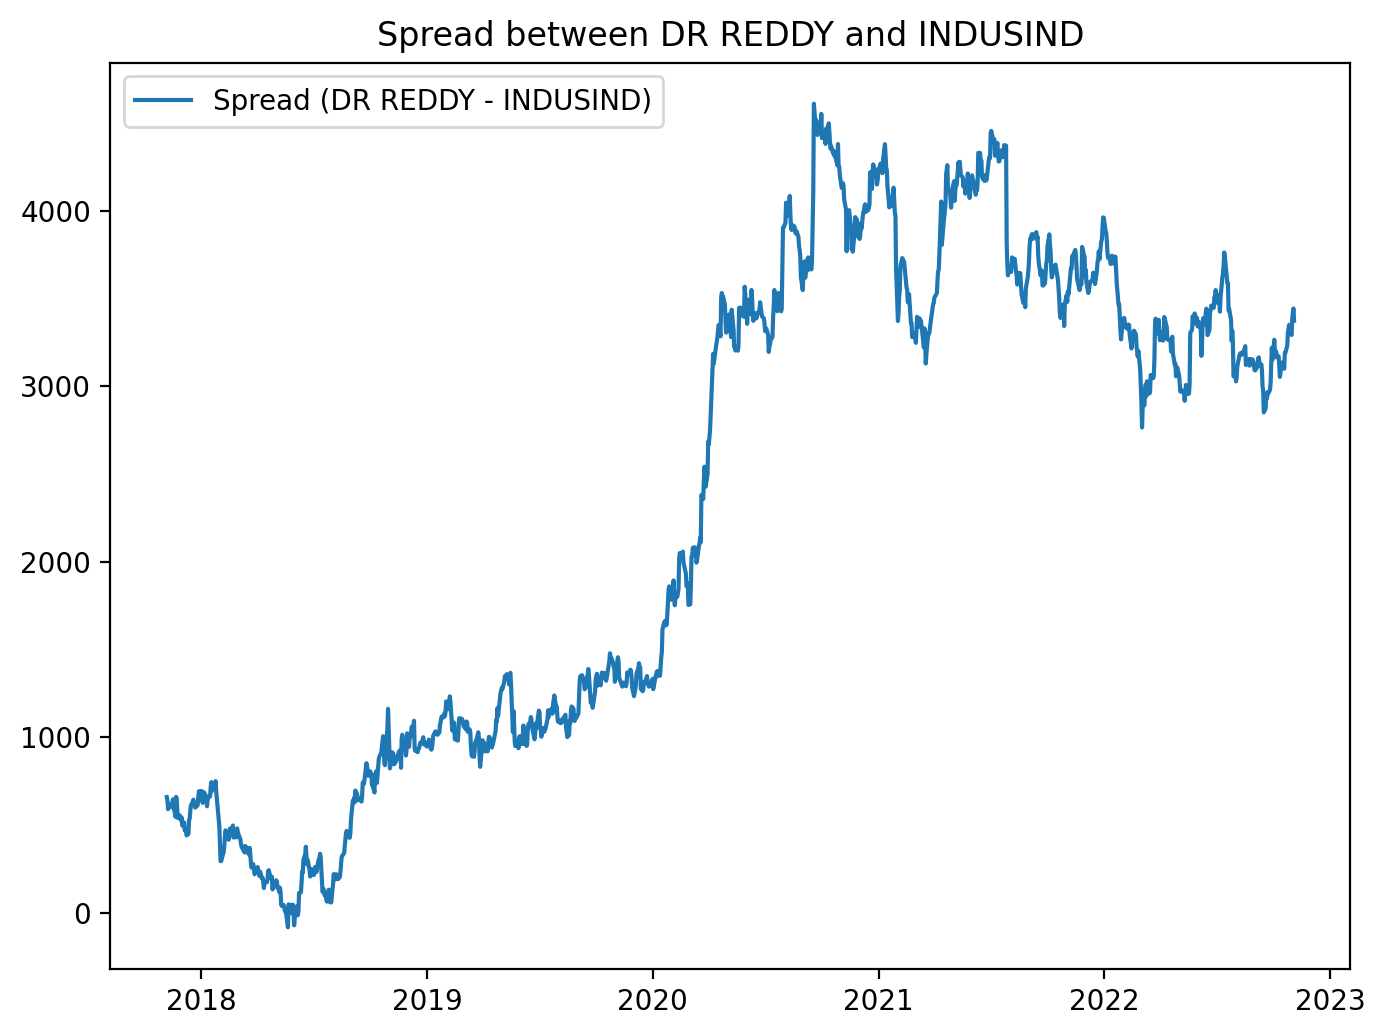

In [ ]:
# plot the spread
figure(figsize=(8, 6), dpi=200)
plt.plot(DRR - IND, label = 'Spread (DR REDDY - INDUSIND)')
plt.legend()
plt.title("Spread between DR REDDY and INDUSIND")

In [ ]:
!pip install statsmodels


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Check out the cointegration value: Null hyp. = no cointegration
import statsmodels.tsa.stattools as ts 
result = ts.coint(DRR, IND)

In [ ]:
# Cointegration test: A technique used to find a potential correlation in a time series (long term)
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.
# Uses the augmented Engle-Granger two-step cointegration test.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.4747493368078738


In [ ]:
# since it does not satisy the cointegration test, we can safely assume that there is inverse correlation bw the time series

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Compute the ADF test for Berkshire Hathaway and Microsoft
# With all time series, you want stationary data else the data will be hard to predict.
# ADF for Berkshire Hathaway Class B


In [ ]:
APOL_ADF = adfuller(DRR)
print('P value for the Augmented Dickey-Fuller Test is', APOL_ADF[1])
ENT_ADF = adfuller(IND)
print('P value for the Augmented Dickey-Fuller Test is', ENT_ADF[1])
Spread_ADF = adfuller(DRR - IND)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])

Ratio_ADF = adfuller(DRR/IND)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
# Spread looks fine. If you'd want even better results, consider taking the difference (order 1) of Berkshire and MSFT

# Results: can only claim stationary for the spread (since P value < 0.05). This suggests a constant mean over time.
# Therefore, the two series are cointegrated.

P value for the Augmented Dickey-Fuller Test is 0.7024760466747054
P value for the Augmented Dickey-Fuller Test is 0.5239015943333625
P value for the Augmented Dickey-Fuller Test is 0.7119690806228965
P value for the Augmented Dickey-Fuller Test is 0.3833833921532205


Text(0.5, 1.0, 'Price Ratio between DR REDDY and INDUSSIND')

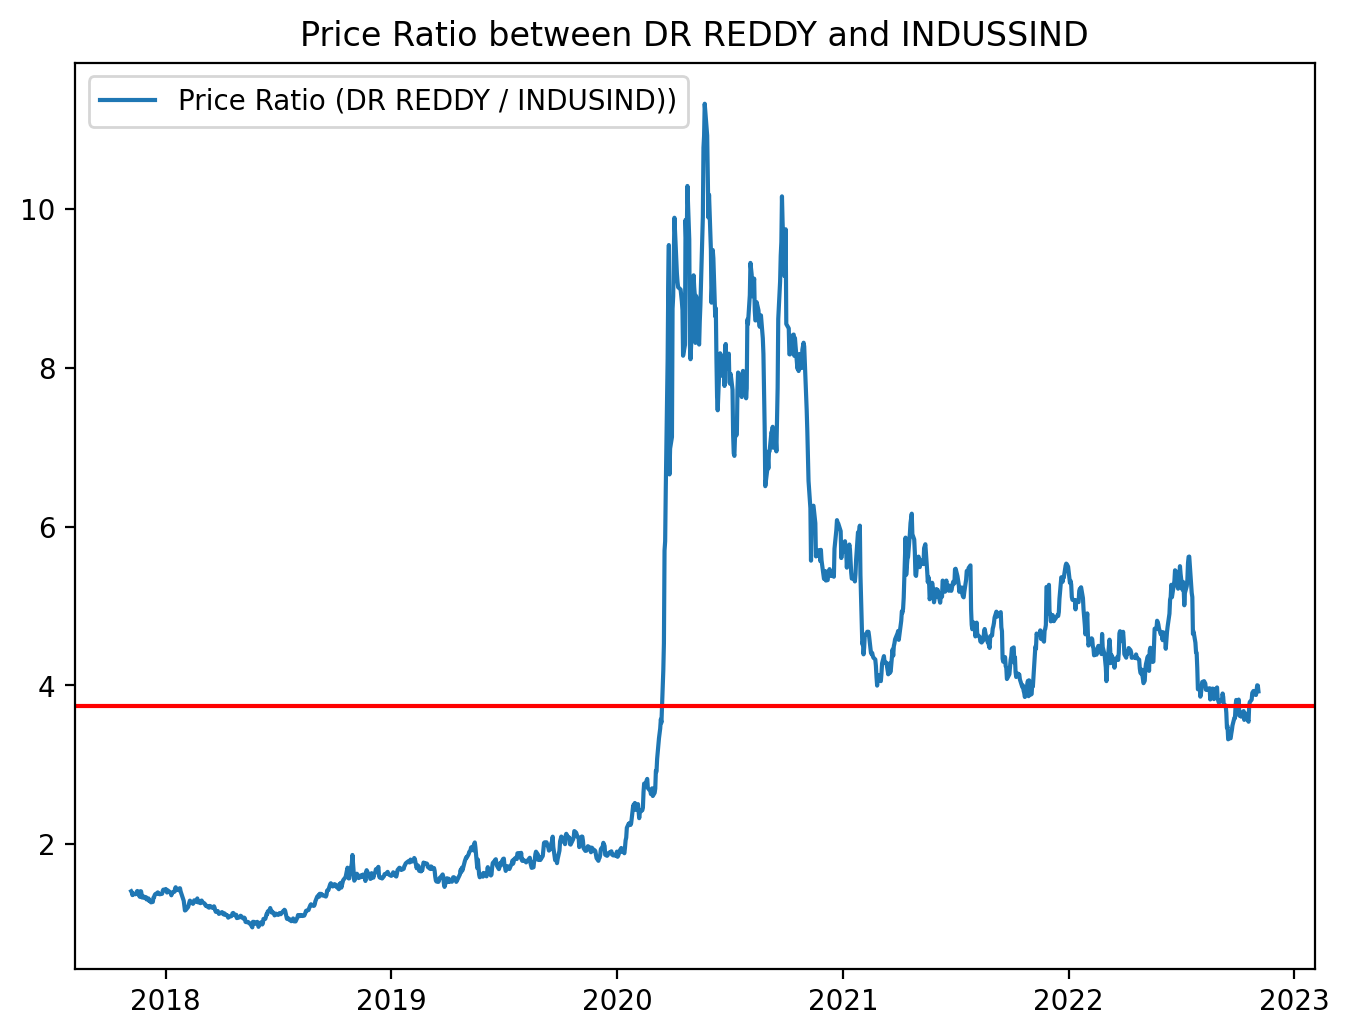

In [ ]:
# Also, we can take a look at the price ratios between the two time series.
figure(figsize=(8, 6), dpi=200)
ratio = DRR/IND
plt.plot(ratio, label = 'Price Ratio (DR REDDY / INDUSIND))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between DR REDDY and INDUSSIND")

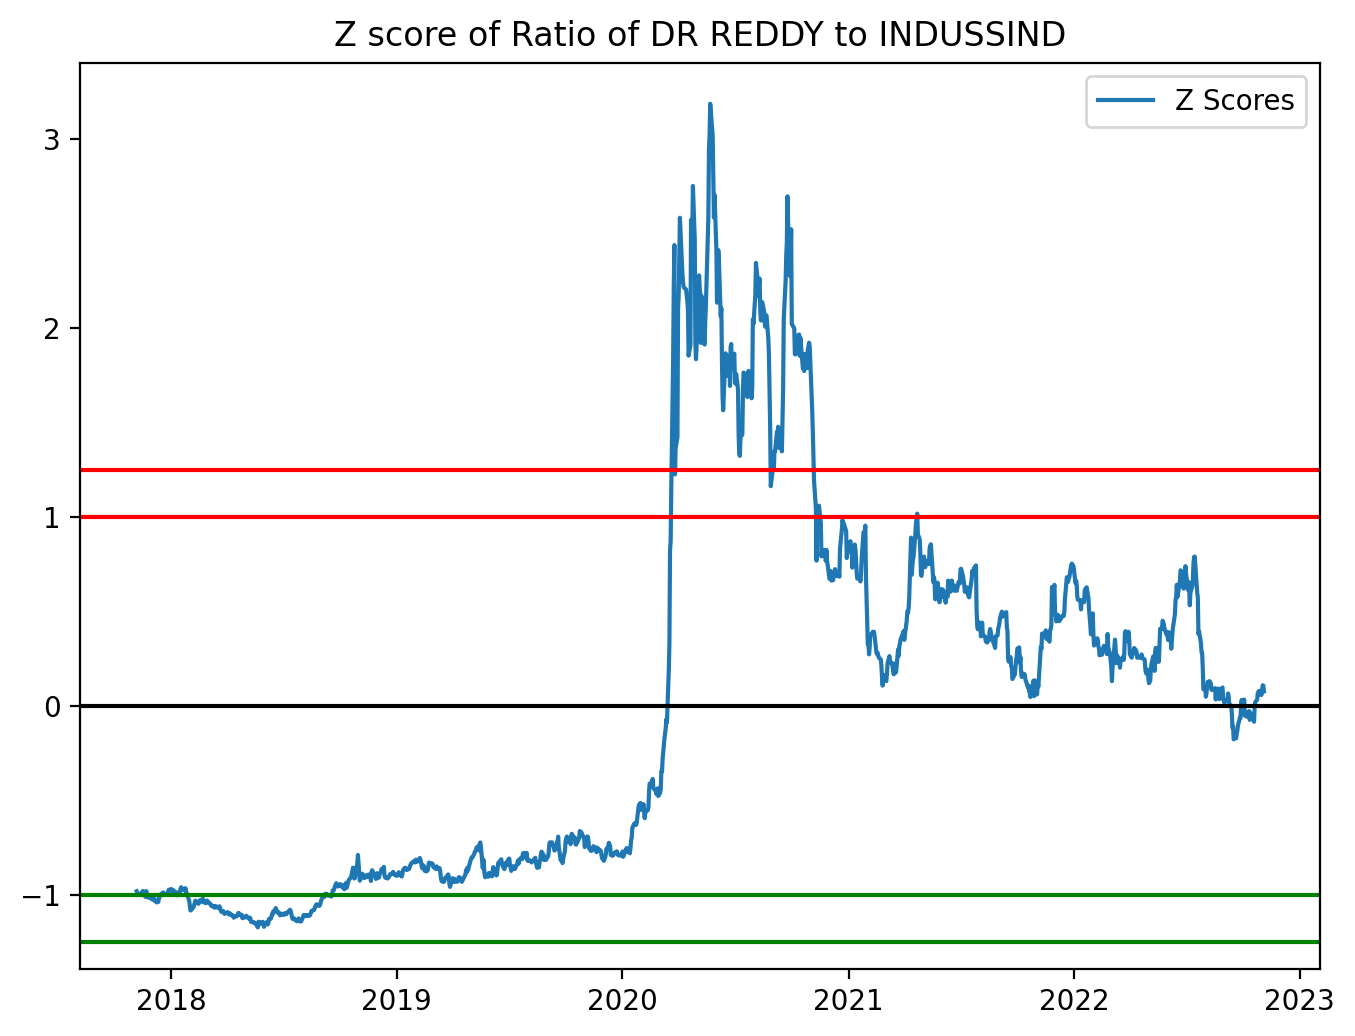

In [ ]:
# standardizing the ratio to get a upper and lower bound to help evaluate the trends
figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of the data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of the data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of the data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of DR REDDY to INDUSSIND')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can 
# determine when you can go long or short the pair (BRK_B to MSFT).

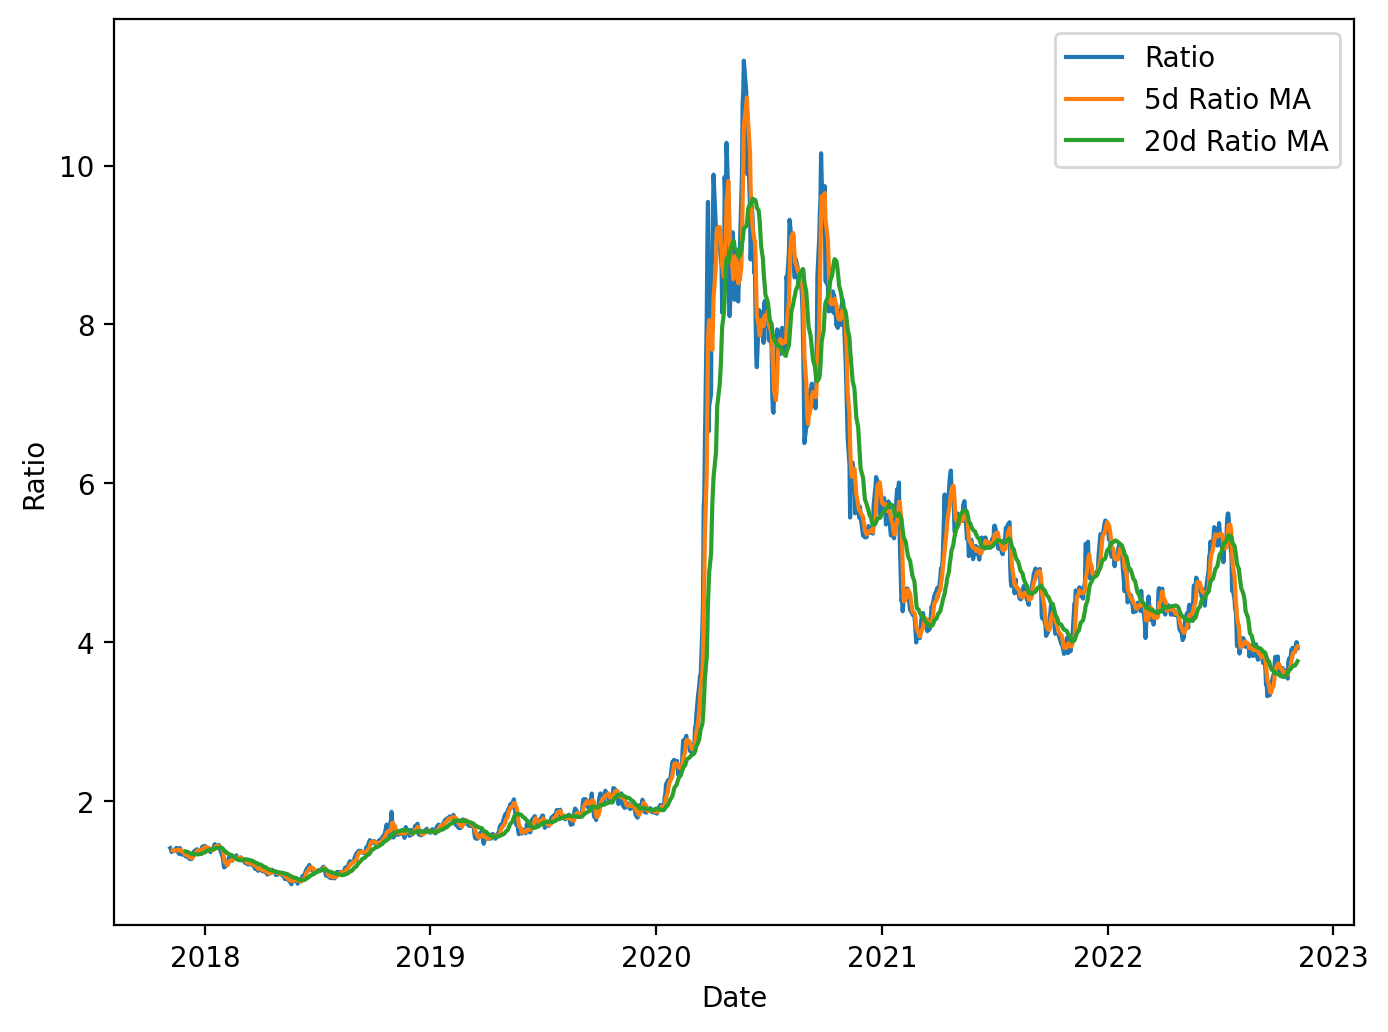

In [ ]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

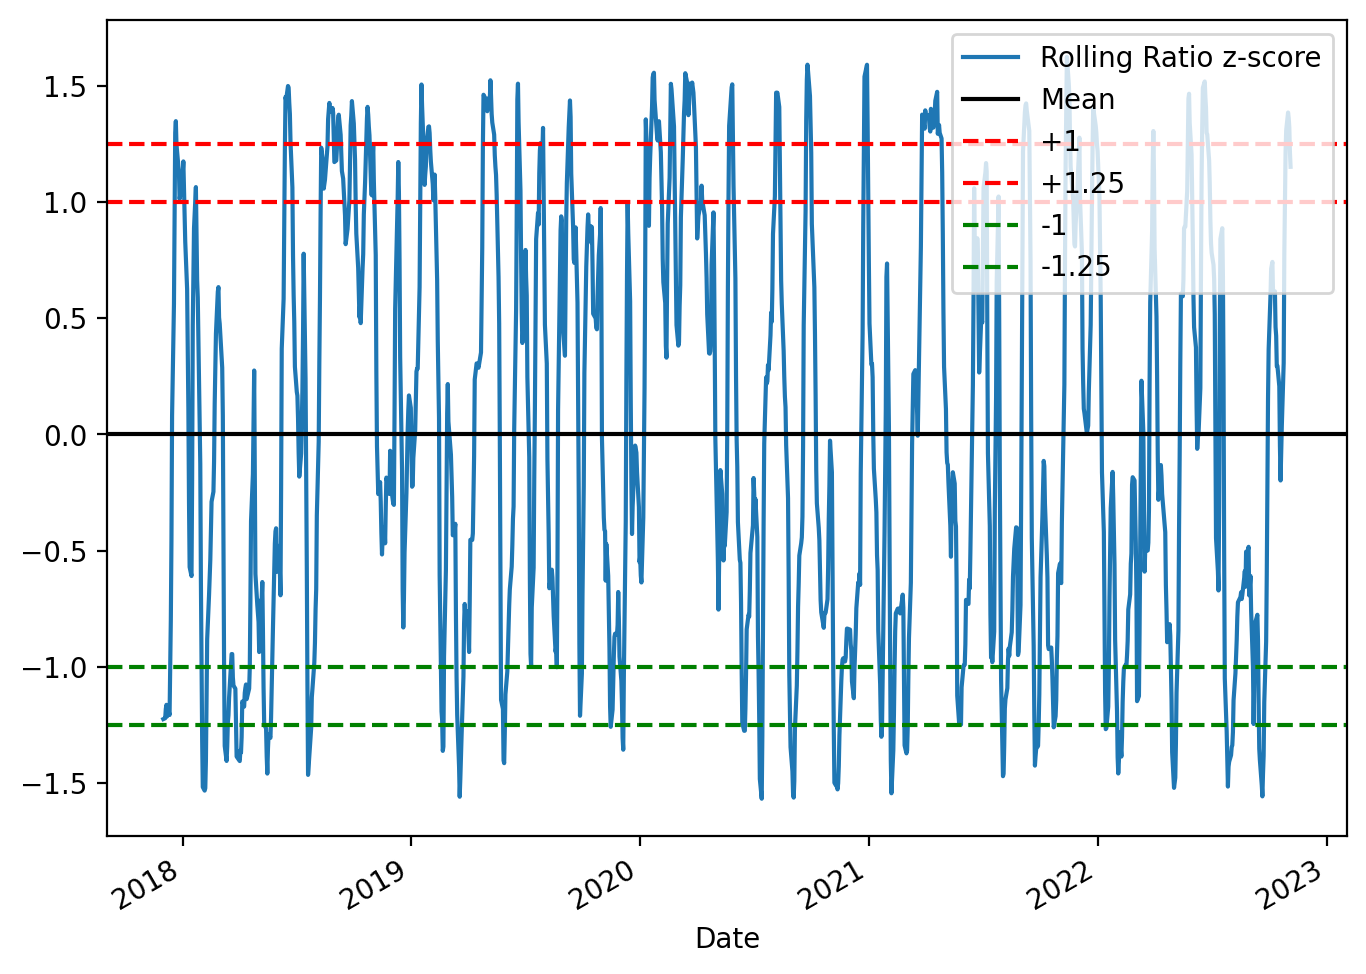

In [ ]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

In [ ]:
len(ratio)-365

871

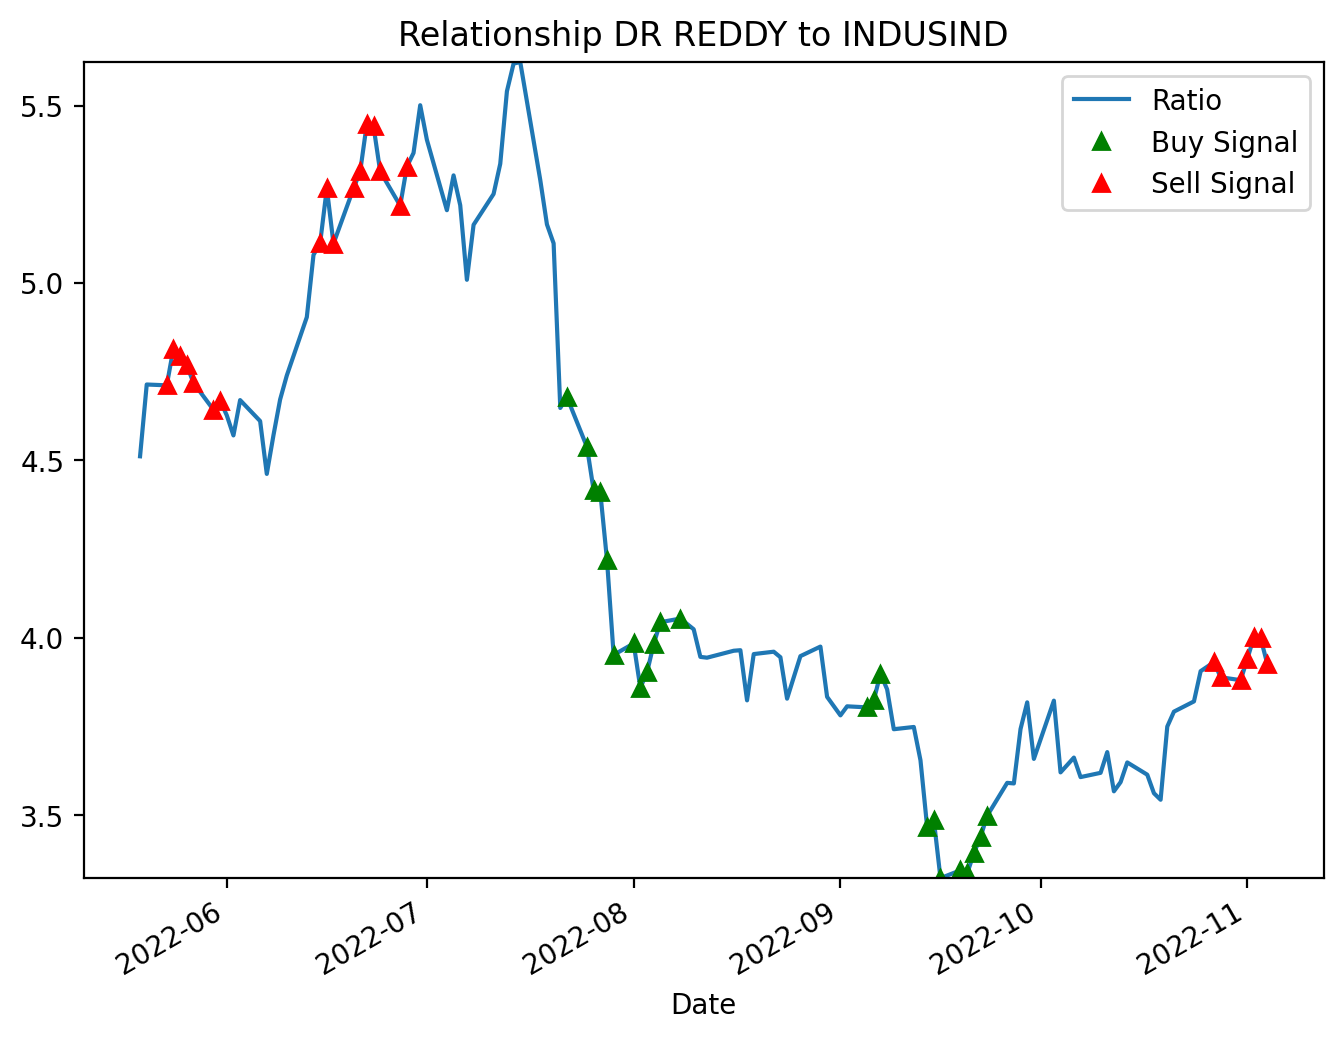

In [ ]:
figure(figsize=(8, 6), dpi=200)
ratio[1119:].plot()
buy = ratio[1119:].copy()
sell = ratio[1119:].copy()
buy[zscore_20_5[1119:]>-1] = 0
sell[zscore_20_5[1119:]<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio[1119:].min(), ratio[1119:].max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship DR REDDY to INDUSIND')
plt.show()